# Project - Bulding a Healthy Daily Meal Plan

This project uses OpenAI API version 1 and later.

In [1]:
pip install openai -q

Note: you may need to restart the kernel to use updated packages.


### OpenAI Authentication
To use this notebook as shown, you must acquire an OpenAI API Key and set it as an environment variable or load it from a file.

1. Sign up at: https://platform.openai.com/signup
2. Generate a new API Key

In [2]:
import os
import openai

from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)
openai.api_key = os.getenv('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI()

### Generate the meal plan based on a list of ingredients 

In [3]:
def create_meals(ingredients, kcal=2000):
    from openai import OpenAI
    client = OpenAI()
    
    prompt = f'''Create a healthy daily meal plan for breakfast, lunch and dinner based on
    the following ingredients {ingredients}.
    Explain each recipe.
    The total daily intake of kcal should be below {kcal}.
    Assign a suggestive and concise title to each meal.
    Your answer should end with 'Titles: ' and the title of each recipe.'''
    
    #     print(prompt)
    messages = [
        {'role': 'system', 'content': 'You are a talented cook.'},
        {'role': 'user', 'content': prompt}
    ]
    
    response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages=messages,
        temperature=1,
        max_tokens = 1024,
        n=1
    )
    return response.choices[0].message.content

foods = 'broccoli, chicken, fish, vegetables, cabbage, eggs, olive oil'
output = create_meals(foods)
print(output)


Breakfast - Broccoli and Egg Omelette
- Heat a non-stick skillet over medium heat and add a teaspoon of olive oil.
- Sauté chopped broccoli and mixed vegetables until tender.
- In a bowl, whisk eggs and pour over the cooked vegetables.
- Cook until the eggs are set and then fold the omelette in half.
- Serve with a sprinkle of salt and pepper.

Lunch - Grilled Chicken and Cabbage Salad
- Marinate chicken breast in olive oil, lemon juice, and seasoning for at least 30 minutes.
- Grill the chicken until fully cooked and nicely charred.
- Shred cabbage and mix with other vegetables for the salad base.
- Slice the grilled chicken and top the salad with it.
- Drizzle with olive oil and lemon dressing.

Dinner - Baked Fish with Roasted Vegetables
- Season fish fillets with salt, pepper, and a squeeze of lemon juice.
- Place the fish on a baking tray and bake in the oven until cooked through.
- Toss mixed vegetables (such as bell peppers, zucchini, and onions) with olive oil, salt, and herbs.

In [3]:
def create_meals(ingredients, kcal=2000):
    from openai import OpenAI
    client = OpenAI()
    
    prompt = f'''Create a healthy daily meal plan for breakfast, lunch and dinner based on
    the following ingredients {ingredients}.
    Explain each recipe.
    The total daily intake of kcal should be below {kcal}.
    Assign a suggestive and concise title to each meal.
    Your answer should end with 'Titles: ' and the title of each recipe.'''
    
    #     print(prompt)
    messages = [
        {'role': 'system', 'content': 'You are a talented cook.'},
        {'role': 'user', 'content': prompt}
    ]
    
    response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages=messages,
        temperature=1,
        max_tokens = 1024,
        n=1
    )
    return response.choices[0].message.content

foods = 'broccoli, chicken, fish, vegetables, cabbage, eggs, olive oil'
output = create_meals(foods)
print(output)


Breakfast - Broccoli and Egg Omelette
- Heat a non-stick skillet over medium heat and add a teaspoon of olive oil.
- Sauté chopped broccoli and mixed vegetables until tender.
- In a bowl, whisk eggs and pour over the cooked vegetables.
- Cook until the eggs are set and then fold the omelette in half.
- Serve with a sprinkle of salt and pepper.

Lunch - Grilled Chicken and Cabbage Salad
- Marinate chicken breast in olive oil, lemon juice, and seasoning for at least 30 minutes.
- Grill the chicken until fully cooked and nicely charred.
- Shred cabbage and mix with other vegetables for the salad base.
- Slice the grilled chicken and top the salad with it.
- Drizzle with olive oil and lemon dressing.

Dinner - Baked Fish with Roasted Vegetables
- Season fish fillets with salt, pepper, and a squeeze of lemon juice.
- Place the fish on a baking tray and bake in the oven until cooked through.
- Toss mixed vegetables (such as bell peppers, zucchini, and onions) with olive oil, salt, and herbs.

In [4]:
titles = output.splitlines()[-3:]
print(titles)


['- Broccoli and Egg Omelette', '- Grilled Chicken and Cabbage Salad', '- Baked Fish with Roasted Vegetables']


In [5]:
titles = [t.strip('- ') for t in titles]
print(titles)


['Broccoli and Egg Omelette', 'Grilled Chicken and Cabbage Salad', 'Baked Fish with Roasted Vegetables']


### Generate images for meals using DALL-E

In [6]:
def create_and_save_image(title, model='dall-e-3', extra=''):
    from openai import OpenAI
    client = OpenAI()
    
    import requests
    import shutil
    
    image_prompt = f'{title}, {extra}, high quality food photography'
#     print(image_prompt)
  
    # making the API call
    response = client.images.generate(
        model=model,
        prompt=image_prompt,
        n=1,
        size='1024x1024'
    )
    
    image_url = response.data[0].url
    print()
    print(image_url)
    
    image_resource = requests.get(image_url, stream=True)
    print(image_resource.status_code)
    
    image_filename = f'{title}.png'
    if image_resource.status_code == 200:
        with open(image_filename, 'wb') as f:
            shutil.copyfileobj(image_resource.raw, f)
            return image_filename
    else:
        print('Error accessing the image!')
        return False
    




https://oaidalleapiprodscus.blob.core.windows.net/private/org-pE7UUoM6NJXEefPTGOsv9KU4/user-EUJA0zK0IhzCXF4f11CkjlsA/img-Qws0sNBsm6eTkbt1ClVR0AzM.png?st=2026-02-12T18%3A59%3A17Z&se=2026-02-12T20%3A59%3A17Z&sp=r&sv=2026-02-06&sr=b&rscd=inline&rsct=image/png&skoid=9346e9b9-5d29-4d37-a0a9-c6f95f09f79d&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2026-02-12T01%3A27%3A38Z&ske=2026-02-13T01%3A27%3A38Z&sks=b&skv=2026-02-06&sig=I1Y2EoGliUR4FXcNw4GFl0H1Qm8/ULt7KFSigqGROvI%3D
200
Broccoli and Egg Omelette.png


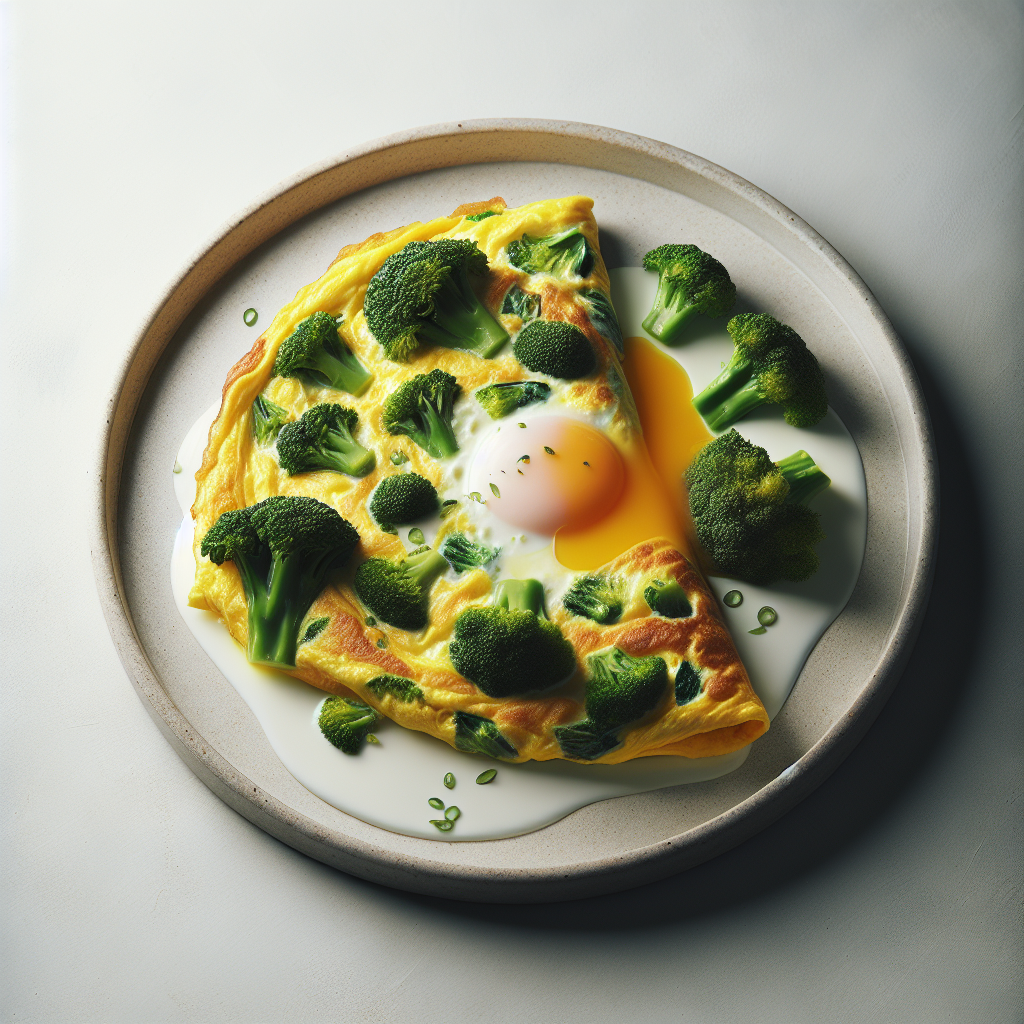

In [7]:
image_filename = create_and_save_image(titles[0], extra='white background')
print(image_filename)
    
from PIL import Image
Image.open(image_filename)

# for _ in range(3):
#     image_filename = create_and_save_image(titles[_], 'white background')
#     print(image_filename)
    

### Using the new GPT MODEL

Broccoli and Egg Omelette.png


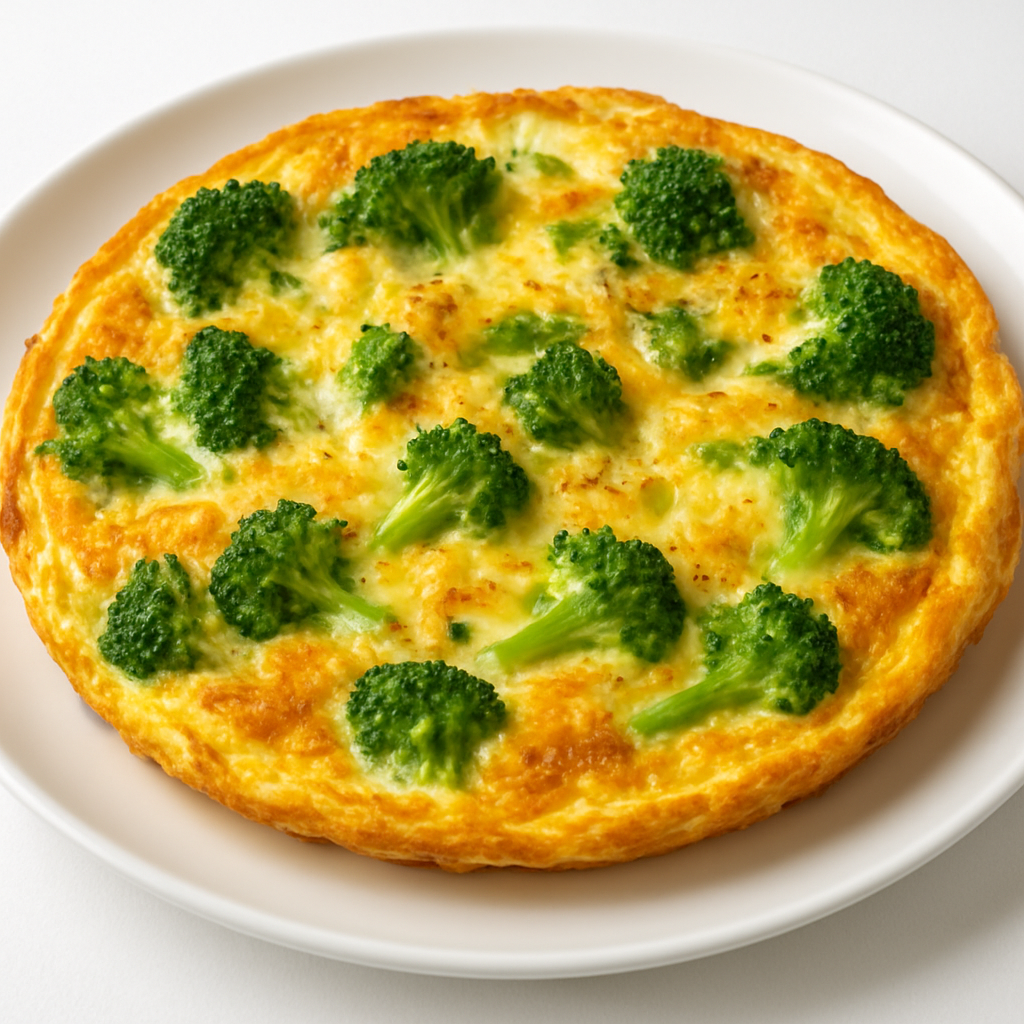

In [9]:
from openai import OpenAI
import base64
from PIL import Image

client = OpenAI()

def create_and_save_image(title, model="gpt-image-1-mini", extra=""):

    image_prompt = f"{title}, {extra}, high quality food photography"

    # chamada nova da API
    response = client.images.generate(
        model=model,
        prompt=image_prompt,
        size="1024x1024"
    )

    # imagem já vem em base64
    image_base64 = response.data[0].b64_json

    image_filename = f"{title}.png"

    # salvar arquivo
    with open(image_filename, "wb") as f:
        f.write(base64.b64decode(image_base64))

    return image_filename


# usando sua chamada original
image_filename = create_and_save_image(titles[0], extra="white background")
print(image_filename)

Image.open(image_filename)
